# House Pricing with KNN

Let’s start with importing Boston Housing prices from sklearn - it’s preinstalled and can be accessed via:

from sklearn.datasets import load_boston
boston = load_boston()

Our goal in this task will be to use KNN to predict housing prices. KNN can be used both for regression (prediction of prices) and classification (to which group an object belongs).

Implement:
- Load Boston Dataset and split it into train data and test data (70%, 30%).
- Train and plot KNN for at least 3 different K.

Now let’s get to more complicated dataset:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Our task will be the same:
- Load data, it’s already split into train and test.
- Test KNN for various K. Benchmark your result and choose K which gives the best results.
- use XGBOOST


Importing libraries

In [34]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import HTML

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

import xgboost

%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6]

## Loading data and training the model

In [35]:
boston = load_boston()
features_train, features_test, labels_train, labels_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=0)

features_train = pd.DataFrame(features_train, columns = boston.feature_names)
features_test = pd.DataFrame(features_test, columns = boston.feature_names)

features_train = features_train.iloc[:, 5]
features_test = features_test.iloc[:, 5]

labels_train = pd.DataFrame(labels_train, columns = ['Price'])
labels_test = pd.DataFrame(labels_test, columns = ['Price'])

In [3]:
features_train

0      5.019
1      6.538
2      6.335
3      6.345
4      5.961
       ...  
349    5.708
350    7.178
351    6.021
352    6.030
353    5.572
Name: RM, Length: 354, dtype: float64

## Scatter plot of the training data

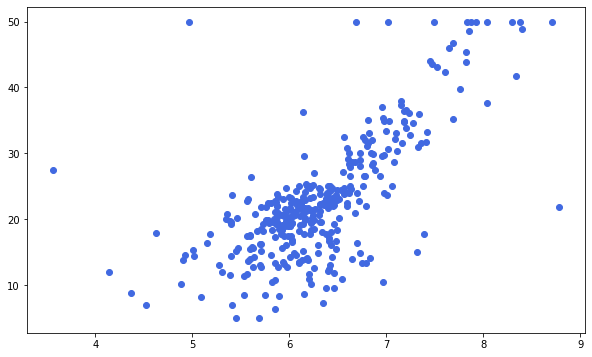

In [36]:
plt.scatter(features_train, labels_train, c='royalblue')
plt.show()

## Creating and training the model

In [63]:
n_neighbors = 19
weights = 'uniform'
# model = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=70,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model.fit(features_train.values.reshape(-1, 1), labels_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=70, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.75,
             reg_lambda=0.45, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method=None, validate_parameters=False, verbosity=None)

## Visualising predictions

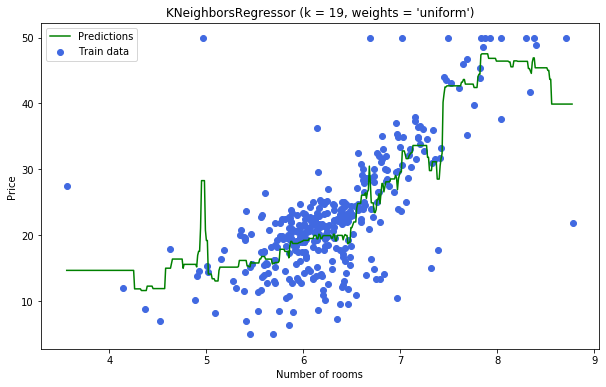

In [68]:
plot_range = np.arange(min(features_train), max(features_train), 0.01)

pred = model.predict(plot_range.reshape(-1, 1))

new_X, new_y = zip(*sorted(zip(plot_range.reshape(-1, 1), pred))) 
plt.scatter(features_train.values.reshape(-1, 1), labels_train, c='royalblue', label='Train data')
plt.plot(new_X, new_y, c='g', label='Predictions')    
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.ylabel('Price')
plt.xlabel('Number of rooms')
    
plt.show()

## Testing the model

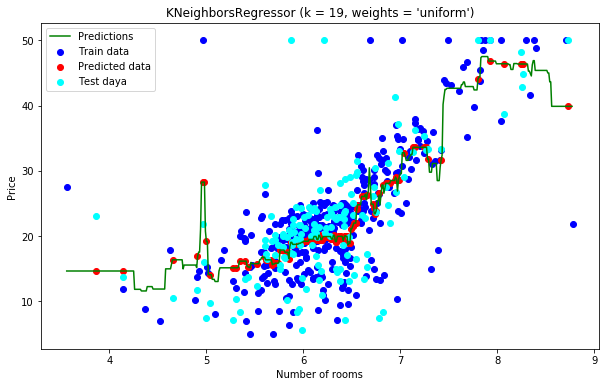

In [69]:
pred = model.predict(features_test.values.reshape(-1, 1))

plt.scatter(features_train.values.reshape(-1, 1), labels_train, c='blue', label='Train data')
plt.plot(new_X, new_y, c='g', label='Predictions')
plt.scatter(features_test, pred, c='red', label='Predicted data')
plt.scatter(features_test, labels_test, c='cyan', label='Test daya')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
plt.ylabel('Price')
plt.xlabel('Number of rooms')
    
plt.show()

## Model score

In [70]:
score = model.score(features_test.values.reshape(-1, 1), labels_test)
score = round(score*100, 2)
display(HTML('<p>The mode score is <strong>' + str(score) + '%</strong>'))
